In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:

df_personnel = pd.read_csv('data_sets/2022-ukraine-russian-war/russia_losses_personnel.csv', sep=',')
# Load equipment losses
df_equipment = pd.read_csv('data_sets/2022-ukraine-russian-war/russia_losses_equipment.csv')
df_equipment


,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN
5,2022-03-02,7,30,31,211,862,85,40,355,60,3,2,9,NaN,NaN
6,2022-03-03,8,30,31,217,900,90,42,374,60,3,2,11,NaN,NaN
7,2022-03-04,9,33,37,251,939,105,50,404,60,3,2,18,NaN,NaN
8,2022-03-05,10,39,40,269,945,105,50,409,60,3,2,19,NaN,NaN
9,2022-03-06,11,44,48,285,985,109,50,447,60,4,2,21,NaN,NaN


In [4]:
df_copy_equipment = df_equipment[['day', 'helicopter', 'tank', 'military auto', 'drone', 'naval ship', 'field artillery']]
df_copy_equipment

,day,helicopter,tank,military auto,drone,naval ship,field artillery
0,2,7,80,100,0,2,49
1,3,26,146,130,2,2,49
2,4,26,150,130,2,2,50
3,5,29,150,291,3,2,74
4,6,29,198,305,3,2,77
5,7,31,211,355,3,2,85
6,8,31,217,374,3,2,90
7,9,37,251,404,3,2,105
8,10,40,269,409,3,2,105
9,11,48,285,447,4,2,109


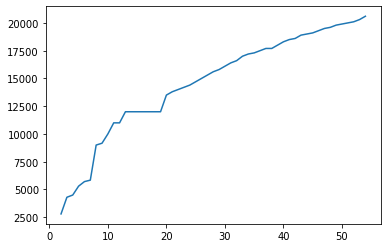

In [5]:
# Create data
x, y = df_personnel['day'], df_personnel['personnel']
# Create plot
plt.plot(x, y)
plt.show()

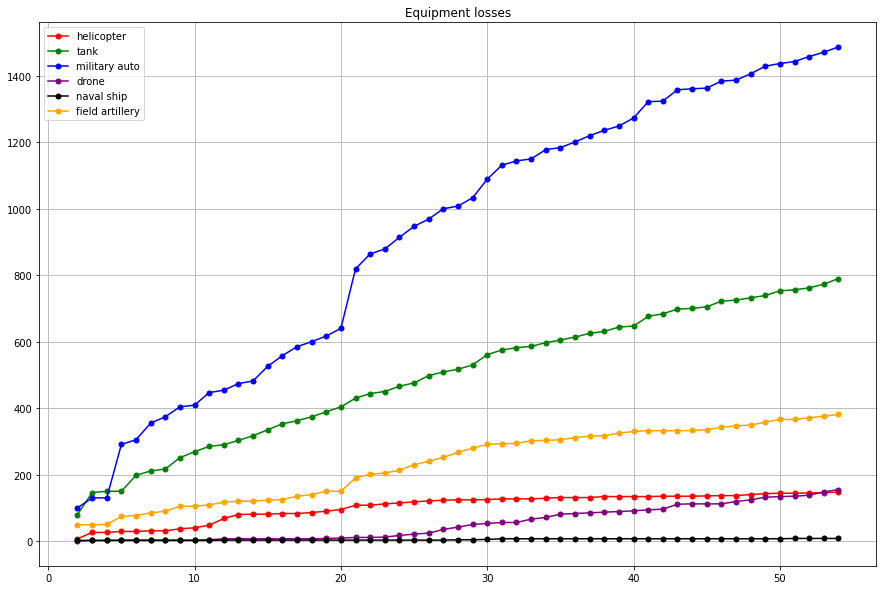

In [74]:
x =  df_copy_equipment['day'] 
y = df_copy_equipment['helicopter']
y1 = df_copy_equipment['tank']
y2 = df_copy_equipment['military auto']
y3 = df_copy_equipment['drone']
y4 = df_copy_equipment['naval ship']
y5 = df_copy_equipment['field artillery']

fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Equipment losses')
ax.plot(x, y, label='helicopter', color='red', marker='o', markersize=5)
ax.plot(x,y1, label='tank', color='green', marker='o',markersize=5)
ax.plot(x,y2, label='military auto', color='blue', marker='o',markersize=5)
ax.plot(x,y3, label='drone', color='purple', marker='o',markersize=5)
ax.plot(x,y4, label='naval ship', color='black', marker='o',markersize=5)
ax.plot(x,y5, label='field artillery', color='orange', marker='o',markersize=5)
ax.grid()
ax.legend()
plt.show()


[0 1 2 3 4 5 6 7 8 9]
